# Indice:
1. Indice
2. Introduzione
3. Import del Dataset e analisi preliminari
4. Manipolazione e pulizia (Data Wrangling)
    1. Valutazione dei NaN
    2. Divisione del set
        1. Professori
        2. Questionario
5. Analisi Statistica Esplorativa
6. Machine Learning
    1. Preparazione Dataset
        1. Normalizzazioni
        2. One-Hot Encoding
    2. Validazione modello
        1. Divisione Traning e Testing Set
        2. Grid Search e Cross Validation
    3. Addestramento, Predizione e Confronto Accuratezza
7. Conclusioni
8. Referenze


# Introduzione


Il set di dati __wiki4HE__ contiene informazioni su un questionario proposto a dei professori universitari, ai quali è stato chiesto di rispondere a delle domande sull'utilizzo di Wikipedia come risorsa didattica.

Il dataset è composto da due sottoinsiemi contenenti i dati demografici degli intervistati e le relative risposte alle domande poste loro.
I professori, che si sono sottoposti al sondaggio, appartengono a due diverse università spagnole, ovvero la _Universitat Oberta de Catalunya_ e la _Universitat Pompeu Fabra_, e sono specializzati in diversi ambiti accademici.
La scala dei valori delle risposte all'indagine variano da 1 a 5, dove 1 corrisponde a “totale disaccordo” mentre 5 corrisponde a “totalmente d'accordo"

Il lavoro su questo dataset si suddividerà in steps nei quali si analizzeranno i dati, in seguito questi verranno combinati così da incrementare le informazioni a disposizione per l'addestramento ed infine, verrà eseguita una gestione degli eventuali dati mancanti.
Ci si soffermerà anche sul confronto fra le funzioni ottimizzate delle librerie importate ed altre funzioni che vanno a simulare le prime. Quest'ultime sono scritte in Python e sfruttano il linguaggio e i suoi costrutti.

Lo scopo ultimo di questo elaborato è quello di utilizzare questo dataset per l'addestramento di una macchina capace di predirre le risposte sull'utilizzo di Wikipedia come stumento per l'integrazione del materiale didattico da parte degli studenti, questo sarà possibile analizzando le caratteristiche dei professori e delle risposte date da ognuno di essi.
Nel dataset sono presenti domande specifiche che danno una risposta all'obiettivo della predizione, quindi verranno escluse dal set di dati utilizato per l'addestramento.


# Import del Dataset e analisi preliminari
Dopo aver importato il dataset, è stato sostituito il carattere "?" che rappresenta una risposta mancante con il valore NaN di numpy.

Viene eseguita una stampa dei primi campioni per ottenere una visione generica del dataset che si sta analizzando e in seguito vengono stampate le informazioni generali relative alla dimensione e ai tipi di ogni attributo del set di dati.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
%matplotlib inline
import textwrap
import main

data = pd.read_csv('dataset/uci - missing data/wiki4HE/wiki4HE.csv', sep=';')
pd.set_option('display.max_columns', 54)
data.replace('?', np.nan, inplace=True)

#info
data.head

<bound method NDFrame.head of      AGE  GENDER DOMAIN  PhD YEARSEXP  UNIVERSITY UOC_POSITION OTHER_POSITION  \
0     40       0      2    1       14           1            2            NaN   
1     42       0      5    1       18           1            2            NaN   
2     37       0      4    1       13           1            3            NaN   
3     40       0      4    0       13           1            3            NaN   
4     51       0      6    0        8           1            3            NaN   
..   ...     ...    ...  ...      ...         ...          ...            ...   
908   43       0      5    1       21           2          NaN            NaN   
909   53       0      6    0       25           2          NaN            NaN   
910   39       0      5    1        9           2          NaN            NaN   
911   40       0      3    1       10           2          NaN            NaN   
912   41       1      3    1       12           2          NaN            NaN  


# Manipolazione e pulizia (Data Wrangling)

##  Valutazione dei NaN

Ai fini dell'organizzazione del lavoro di pulizia, risulta interessante capire quanti e dove sono presenti i valori Nan.
Si puo notare che la maggior parte delle istanze ha almeno un valore NaN, per questo motivo risulta utile visionare il conteggio degli NaN per ogni attributo


In [2]:
# numero di righe con almeno un na:
data.shape[0] - data.dropna().shape[0]

737

In [3]:
#numero di na per ogni attributo
pd.DataFrame({ 'contain na ': data.isna().any() ,'number of na ': data.isna().sum() })

,contain na,number of na
AGE,False,0
GENDER,False,0
DOMAIN,True,2
PhD,False,0
YEARSEXP,True,23
UNIVERSITY,False,0
UOC_POSITION,True,113
OTHER_POSITION,True,261
OTHERSTATUS,True,540
USERWIKI,True,4


## Divisione del set

Data la struttura del dataset, è possibile lavorare separando i dati demografici dei professori dalle domande del questionario. Per questo motivo dividiamo il set in due sottoinsiemi che chiameremo ___"Prof"___ e ___"Questionario"___

In [4]:
prof = data.iloc[:, :10]
questionario = data.iloc[:, 10:]

### Professori

Questo sottoinsieme raccoglie varie informazioni relative ai professori:

 - Età
 - Genere
 - Dominio
 - Anni di esperienza da professore
 - In possesso di PhD
 - Università di appartenenza
 - Posizione lavorativa ricoperta in UOC
 - Se insegna in altri Istituiti Universitari
 - Posizione lavorativa presso altre Università e dipendente di UPF
 - Utente registrato su Wikipedia

Per avere una visione più puntuale del sottoinsieme si utilizza la costruzione di plot descrittivi.

#### Grafici

[Text(-10, 0, 'NaN'),
 Text(0, 0, '0'),
 Text(10, 0, '10'),
 Text(20, 0, '20'),
 Text(30, 0, '30'),
 Text(40, 0, '40'),
 Text(50, 0, '50')]

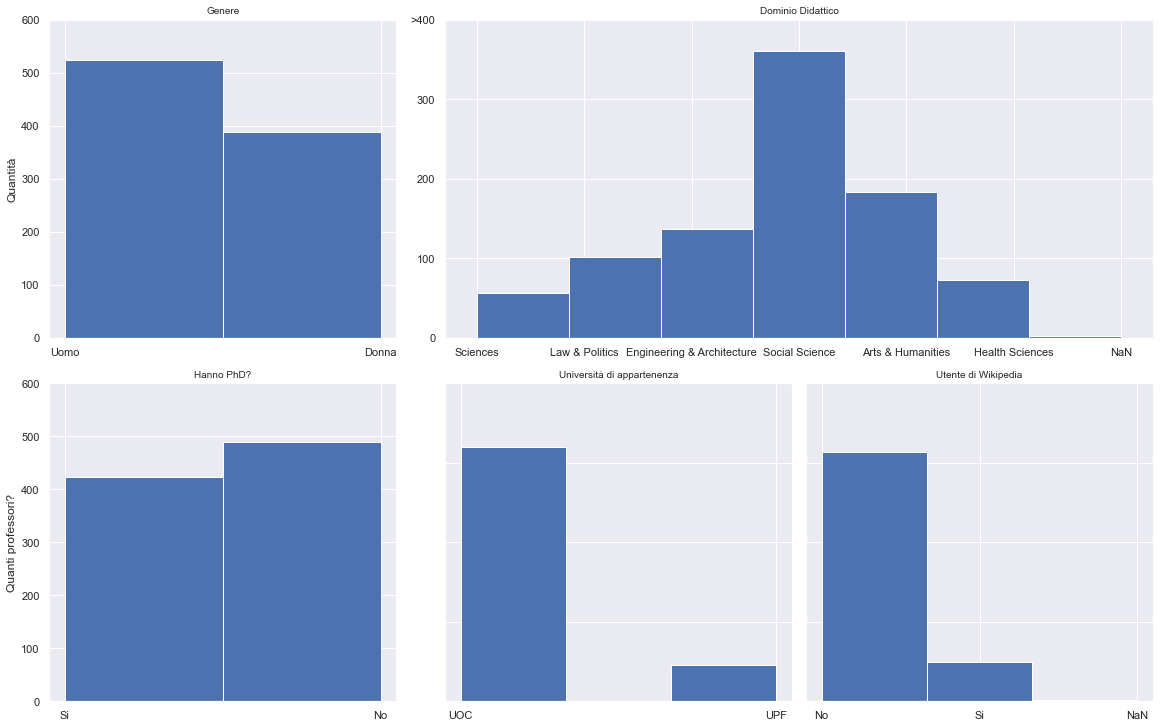

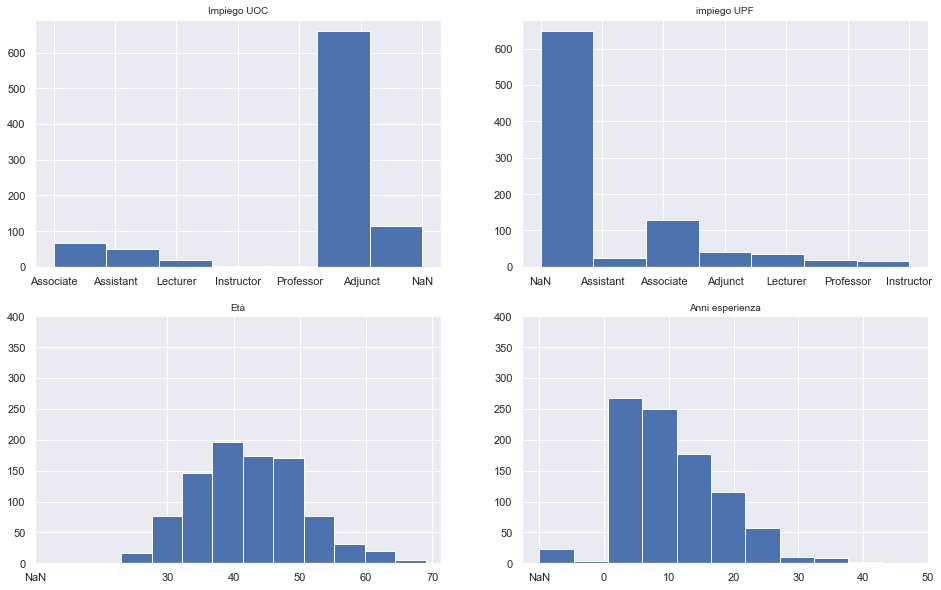

In [5]:
prof['GENDER'] = prof['GENDER'].replace([0,1], ['Uomo', 'Donna'])
prof['UNIVERSITY'] = prof['UNIVERSITY'].replace([1,2], ['UOC','UPF'])

sns.set( style='darkgrid' )
fig = plt.figure(constrained_layout=True, figsize=(16,10))
gs = GridSpec(2, 3, figure=fig)

ax1 = plt.subplot(gs[0,0])
counts, bins, patches = ax1.hist(prof['GENDER'], bins=2)
ax1.set_title("Genere", fontsize = 10)
ax1.set_ylabel("Quantità")
ax1.set_ylim((0, 600))

ax2 = plt.subplot(gs[0,1:])
ax2.hist(prof['DOMAIN'].fillna(0).astype(int).map({0:'NaN', 1: "Arts & Humanities", 2:"Sciences", 3:"Health Sciences",
                                   4:"Engineering & Architecture", 5:"Law & Politics",
                                   6:"Social Science"}), bins=7)
ax2.set_title("Dominio Didattico", fontsize = 10)
ax2.set_ylim((0, 400))
ax2.set_yticks([0, 100, 200, 300, 400])
ax2.set_yticklabels([0, 100, 200, 300, ">400"])


ax3 = plt.subplot(gs[1,0])
ax3.hist(prof['PhD'].map({0: 'No', 1: 'Si'}), bins=2)
ax3.set_title("Hanno PhD?", fontsize = 10)
ax3.set_ylabel("Quanti professori?")
ax3.set_ylim((0, 600))

ax4 = plt.subplot(gs[1,1])
ax4.hist(prof['UNIVERSITY'], bins=3)
ax4.set_title("Università di appartenenza", fontsize = 10)
ax4.set_ylim((0, 1000))
ax4.set_yticks([0, 250, 500, 750, 1000])
ax4.set_yticklabels([ "",  "",  "",  "", ""])

ax5 = plt.subplot(gs[1,2])
ax5.hist(prof['USERWIKI'].fillna(-1).astype(int).map({-1:'NaN', 0: 'No', 1: 'Si'}), bins=3)
ax5.set_title("Utente di Wikipedia", fontsize = 10)
ax5.set_ylim((0, 1000))
ax5.set_yticks([0, 250, 500, 750, 1000])
ax5.set_yticklabels([ "",  "",  "",  "", ""])



fig = plt.figure(figsize=(16,10))

ax6 = plt.subplot(2,2,1)
ax6.hist(prof['UOC_POSITION'].fillna(0).astype(int).map({1: "Professor", 2: "Associate", 3: "Assistant", 4: "Lecturer", 5: "Instructor", 6: "Adjunct", 0:"NaN"}), bins=7)
ax6.set_title("Impiego UOC", fontsize = 10)

ax7 = plt.subplot(2,2,2)
ax7.hist(prof['OTHERSTATUS'].fillna(7).astype(int).map({1: "Professor", 2: "Associate", 3: "Assistant", 4: "Lecturer", 5: "Instructor", 6: "Adjunct", 7:"NaN"}), bins = 7)
ax7.set_title("impiego UPF", fontsize = 10)


ax8 = plt.subplot(2,2,3)
ax8.hist(prof['AGE'].fillna(10).astype(int))
ax8.set_title("Età", fontsize = 10)
ax8.set_ylim((0, 400))
ax8.set_xticks([10, 30, 40, 50, 60, 70])
ax8.set_xticklabels(["NaN", 30, 40, 50, 60, 70])

ax9 = plt.subplot(2,2,4)
ax9.hist(prof['YEARSEXP'].fillna(-10).astype(int))
ax9.set_title("Anni esperienza", fontsize = 10)
ax9.set_ylim((0, 400))
ax9.set_xticks([-10, 0, 10, 20, 30, 40, 50])
ax9.set_xticklabels(["NaN", 0, 10, 20, 30, 40, 50])

#### Pulizia degli attributi e cambio dtype


I valori nulli relativi agli anni di esperienza possono essere interpretati come l'assenza di questi ultimi.

I valori nulli relativi al dominio e alla registrazione sono solo 5 e possono essere eliminatiperchè, avendo un dataset da 913 campioni, l'eliminazione di questi 5 non alterano la natura del set.

In [6]:
# se non specificato considero gli anni di esperienza = 0
prof['YEARSEXP'] = prof['YEARSEXP'].fillna(0)

# eliminazione righe con domain e userwiki na
prof = prof[prof['DOMAIN'].notna() & prof['USERWIKI'].notna()]

prof['USERWIKI'] = prof['USERWIKI'].astype(int)

prof['DOMAIN'] = prof['DOMAIN'].astype(int).replace([1,2,3,4,5,6], ['Arts & Humanities', 'Sciences', 'Health Sciences','Engineering & Architecture','Law & Politics','Social Science'])


In [7]:
# cambio dei tipi
prof = prof.astype({'AGE': 'int8','PhD': 'bool','YEARSEXP': 'int8','USERWIKI': 'bool'})

#quanti campioni rimanenti
prof.shape

(907, 10)

#### Incongruenze nel dataset

Gli attributi "OTHER", "OTHER_POSITION" della descrizione non corrispondono a quelli presenti nel DataFrames:
 - __"OTHER"__ - non è presente;
 - __"OTHER_POSITION"__ - non rispecchia i valori attesi.

L'attributo "OTHER_POSITION" del dataset presenta solo due valori, ___1___ e ___2___, questi risultano essere associabili all' attributo "OTHER" nella descrizione.

In [8]:
prof['OTHER_POSITION'].dropna().astype(int).describe()

count    648.000000
mean       1.586420
std        0.492855
min        1.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        2.000000
Name: OTHER_POSITION, dtype: float64

Nel dataset è presente un'altra colonna che non viene descritta sul sito, ovvero "OTHERSTATUS".
I dati di quest'ultima vanno da un minimo di ___1___ a un massimo di ___7___ e risultano essere associabili ai valori attesi dall'attibuto "OTHER_POSITION" del sito, ad esclusione del valore 7.

In [9]:
prof['OTHERSTATUS'].dropna().astype(int).describe()

count    372.000000
mean       4.201613
std        2.223302
min        1.000000
25%        2.000000
50%        4.000000
75%        7.000000
max        7.000000
Name: OTHERSTATUS, dtype: float64

#### Assunzioni

Assumiamo come veritiere le supposizioni precedenti e associamo i vari attributi alle colonne nel dataset:
- "OTHER" (sito) -> "OTHER_POSITION" (dataset)
- "OTHER_POSITION" (sito) -> "OTHERSTATUS" (dataset)

Il valore ___7___ presente nell'attributo "OTHERSTATUS" verrà interpretato come "Altro" e perciò specificherà una posizione lavorativa non in elenco.

In [10]:
prof['OTHERSTATUS'].dropna().astype(int)[prof['OTHERSTATUS'].dropna().astype(int)[:] == 7].count()

106

L'attributo "OTHER_POSITION" inoltre ha maggior parte dei dati mancanti, infatti questa variabile descrive il "lavoro come part-time in un'altra università e membri UPF".
Possiamo affermare che questa domanda è mal progettata in quanto non è applicabile alla maggior parte dei membri della facoltà e che quindi non hanno risposto.

In [11]:
# quanti prof non sono assunti da UOC
prof[prof['UNIVERSITY'] == 'UPF'].shape

(112, 10)

In [12]:
#tutti i professori non associati a UPF non hanno un ruolo in "UOC_POSITION", il ruolo ricoperto è descritto in "OTHERSTATUS"
pd.DataFrame({ 'contain na ': prof[prof['UNIVERSITY'] == 'UPF'].isna().any() ,'number of na ': prof[prof['UNIVERSITY'] == 'UPF'].isna().sum() })

,contain na,number of na
AGE,False,0
GENDER,False,0
DOMAIN,False,0
PhD,False,0
YEARSEXP,False,0
UNIVERSITY,False,0
UOC_POSITION,True,112
OTHER_POSITION,True,112
OTHERSTATUS,True,5
USERWIKI,False,0


A conferma di quanto affermato poco sopra, analizzando l'attributo "OTHER_POSITION" si può notare come nel dataset alcuni professori di UOC hanno un altro impiego presso altre facoltà, mentre nessuno dei professori UPF ne ha

In [13]:
other_pos = prof[(prof["OTHER_POSITION"].notna())].fillna(0)
other_pos[['UOC_POSITION','OTHER_POSITION','OTHERSTATUS']] = other_pos[['UOC_POSITION','OTHER_POSITION','OTHERSTATUS']].astype(int)

#prof di UOC con un altro impiego presso un'altra università
other_pos.loc[(other_pos['OTHER_POSITION'] == 1) & (other_pos['UNIVERSITY'] == 'UOC')]["OTHERSTATUS"].count()

268

In [14]:
#prof di UPF con un altro impiego presso un'altra università
other_pos.loc[(other_pos['OTHER_POSITION'] == 1) & (other_pos['UNIVERSITY'] == 'UPF')]["OTHERSTATUS"].count()


0

#### Valutazione NaN su "UOC_POSITION", "OTHERSTATUS", "OTHER_POSITION"

Un'altra osservazione che possiamo eseguire su questi attributi l'analisi sugli NaN.

In [15]:
pd.DataFrame({ 'contain na ': prof[["UOC_POSITION", "OTHERSTATUS", "OTHER_POSITION"]].isna().any() ,'number of na ': prof[["UOC_POSITION", "OTHERSTATUS", 'OTHER_POSITION']].isna().sum() })

,contain na,number of na
UOC_POSITION,True,112
OTHERSTATUS,True,535
OTHER_POSITION,True,259


Queste tre informazioni presentano un elevato numero di NaN, per questo motivo l'operazione di `fillna()` è estremamente sconsigliata. Questa altererebbe la natura dei dati, andando a creare valutazioni errate nelle fasi successive dello studio e per questo motivo l'unica soluzione percorribile è quella dell' dell'eliminazione netta.

#### Costruzione attributo POSITION

Prima di eliminare dal dataset le colonne citate poco sopra, è possibile recuperare una parte di informazione grazie alla combinazione delle tre colonne.

L' attributo "UNIVERSITY" indica l'università di appartenenza, a seconda dei valori infatti:
- se 1 -> il prof. ha un ruolo in UOC
- se 2 -> il prof. o ha un ruolo un ruolo in UPF o in un'altra università

Dagli studi e dalle analisi precedenti abbiamo osservato come le informazioni sulla posizione lavorativa di un professore sia enunciata negli attributi "UOC_POSITION" e "OTHERSTATUS" per i dipendenti di UOC e solo nell'attributo "OTHERSTATUS" per i dipendenti UPF.

Sfruttando questa conoscenza è possibile ottenere un nuovo attributo "POSITION" che descriverà la posizione di maggior rilievo ricoperta dal professore combinando le informazioni presenti nelle varie colonne.

In [16]:
prof['UOC_POSITION'] = prof['UOC_POSITION'].fillna(0).astype(int)
prof['OTHERSTATUS'] = prof['OTHERSTATUS'].fillna(0).astype(int)
prof['OTHER_POSITION'] = prof['OTHER_POSITION'].fillna(0).astype(int)

# sostituzione del val "Altro" con 0 per sfruttare la UFunc max()
prof['OTHERSTATUS'][ prof['OTHERSTATUS'] > 6] = 0 # considero il 7 come "altro" percio non lo considero

<ipython-input-16-f60dfb56dc25>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prof['OTHERSTATUS'][ prof['OTHERSTATUS'] > 6] = 0 # considero il 7 come "altro" percio non lo considero


##### Confronto fra UFunc e Funzioni semplici

Come si puo vedere di seguito, il confronto conferma quanto ci aspettavamo. Le funzioni ottimizzate risultano essere molto più veloci rispetto alla funzione scritta con il linguaggio ad alto livello.
l'UFunc risulta essere piu velore del

In [17]:
%timeit prof[["UOC_POSITION", "OTHERSTATUS"]].max(axis=1)

717 µs ± 71.4 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


`def merge_two_series_by_max(col1, col2):
    col = []
    for i in range(col1.size):
        if col1[i] >= col2[i]:
            col.append(col1[i])
        else:
            col.append(col2[i])
    return col`

In [ ]:
%timeit main.merge_two_series_by_max(prof['OTHERSTATUS'].array, prof['UOC_POSITION'].array)

La funzione `merge_two_series_by_max(col1, col2)` ha un esecuzione media di 1.61 ms mentre l'ottimizzata 592µs, l'ultima risulta percio essere circa 3 volte pu veloce
Grazie a questo confronto tra funzioni, decidiamo di utlizzare la UFunc dato che questa risulta essere piu efficiente.

Una volta ottenuta la Series contenente la posizione lavorativa più importante ricoperta da ogni professore, la inseriamo nel dataset ed eliminiamo i 3 attributi utilizzati per costruirla poichè questi presentano un gran numero di NaN.

In [ ]:
position = prof[["UOC_POSITION", "OTHERSTATUS"]].max(axis=1).astype('int8')

#inseriamo in ordine la nuova colonna ed eliminiamo 3 colonne
prof.insert(loc=6, column='POSITION', value=position)
prof = prof.drop(columns=['UOC_POSITION', 'OTHERSTATUS', 'OTHER_POSITION'])

# professori che non hanno neanche un ruolo vengono eliminati
prof = prof[prof['POSITION'] != 0]

prof['POSITION'] = prof['POSITION'].replace([1,2,3,4,5,6], ["Professor", "Associate", "Assistant", "Lecturer", "Instructor", "Adjunct"])

In [ ]:
prof.info()

Controllando di nuovo il DataFrame "prof" e i suoi valori NaN possiamo affermare di aver eseguito una pulizia completa del dataset perdendo poche informazioni.

In [ ]:
# mostra na di prof dopo manuipolazioni
pd.DataFrame({ 'contain na ': prof.isna().any() ,'number of na ': prof.isna().sum() })

------------------------------------------------

### Questionario

Questo sottoinsieme raccoglie risposte al sondaggio rilasciate da ogni professore.
Ogni risposta puo avere un solo valore da 1 a 5, dove __1__: rappresenta "fortemente in disaccordo / mai" e __5__: "fortemente d'accordo / sempre"

Argomento | Nome attributo | Desc
----|------|-------
Utilità percepita | PU1 | L'uso di Wikipedia rende più facile per gli studenti sviluppare nuove competenze
 - | PU2 | L'uso di Wikipedia migliora l'apprendimento degli studenti
 - | PU3 | Wikipedia è utile per l'insegnamento
Facilità d'uso percepita | PEU1| Wikipedia è facile da usare
 - | PEU2 | È facile trovare in Wikipedia le informazioni che cerchi
 - | PEU3 | È facile aggiungere o modificare informazioni in Wikipedia
Piacere percepito | ENJ1| L'uso di Wikipedia stimola la curiosità
 - | ENJ2 | L'uso di Wikipedia è divertente
Qualità | QU1| Gli articoli di Wikipedia sono affidabili
 - | QU2 | Gli articoli di Wikipedia sono aggiornati
 - | QU3 | Gli articoli di Wikipedia sono completi
 - | QU4 | Nella mia area di competenza, Wikipedia ha una qualità inferiore rispetto ad altre risorse educative
 - | QU5 | Ho fiducia nel sistema di editing di Wikipedia
Visibilità | VIS1| Wikipedia migliora la visibilità del lavoro degli studenti
 - | VIS2 | È facile avere un registro dei contributi fatti in Wikipedia
 - | VIS3 | Cito Wikipedia nei miei articoli accademici
Immagine sociale | IM1| L'uso di Wikipedia è ben considerato dai colleghi
 - | IM2 | Nel mondo accademico, la condivisione di risorse educative aperte è apprezzata
 - | IM3 | I miei colleghi usano Wikipedia
Atteggiamento di condivisione | SA1| È importante condividere i contenuti accademici in piattaforme aperte
 - | SA2 | È importante pubblicare i risultati della ricerca in altri media che non siano riviste accademiche o libri
 - | SA3 | È importante che gli studenti acquisiscano familiarità con gli ambienti collaborativi online
Comportamento d'uso | USE1| Uso Wikipedia per sviluppare il mio materiale didattico
 - | USE2 | Uso Wikipedia come piattaforma per sviluppare attività educative con gli studenti
 - | USE3 | Raccomando ai miei studenti di usare Wikipedia
 - | USE4 | Raccomando ai miei colleghi di usare Wikipedia
 - | USE5 | Sono d'accordo che i miei studenti usino Wikipedia nei miei corsi
Profilo 2.0 | PF1| Contribuisco ai blog
 - | PF2 | Partecipo attivamente alle reti sociali
 - | PF3 | Pubblico contenuti accademici in piattaforme aperte
Rilevanza del lavoro | JR1| La mia università promuove l'uso di ambienti collaborativi aperti in Internet
 - | JR2 | La mia università considera l'uso di ambienti collaborativi aperti in Internet come un merito dell'insegnamento
Intenzione comportamentale | BI1| In futuro raccomanderò l'uso di Wikipedia ai miei colleghi e studenti
 - | BI2 | In futuro userò Wikipedia nella mia attività di insegnamento
Incentivi | INC1| Per progettare attività educative utilizzando Wikipedia, sarebbe utile: una guida alle migliori pratiche
 - | INC2 | Per progettare attività educative utilizzando Wikipedia, sarebbe utile: ricevere istruzioni da un collega
 - | INC3 | Per progettare attività educative utilizzando Wikipedia, sarebbe utile: ottenere una formazione specifica
 - | INC4 | Sarebbe utile progettare attività educative usando Wikipedia: maggiore riconoscimento istituzionale
Esperienza | EXP1| Consulto Wikipedia per questioni relative al mio campo di competenza
 - | EXP2 | Consulto Wikipedia per altre questioni accademiche
 - | EXP3 | Consulto Wikipedia per questioni personali
 - | EXP4 | Contribuisco a Wikipedia (edizioni, revisioni, miglioramento degli articoli...)
 - | EXP5 | Uso i wiki per lavorare con i miei studenti

Prima di procedere con l'analisi del set di dati verranno eliminate i campioni dei professori non più presenti nel dataset grazie all'utilizzo degli Index

In [ ]:
domande_titles = {
'PU1' :'L\'uso di Wikipedia rende più facile per gli studenti sviluppare nuove competenze',
'PU2' :'L\'uso di Wikipedia migliora l\'apprendimento degli studenti',
'PU3' :'Wikipedia è utile per l\'insegnamento',
'PEU1':'Wikipedia è facile da usare',
'PEU2':'È facile trovare in Wikipedia le informazioni che cerchi',
'PEU3':'È facile aggiungere o modificare informazioni in Wikipedia',
'ENJ1':'L\'uso di Wikipedia stimola la curiosità',
'ENJ2':'L\'uso di Wikipedia è divertente',
'Qu1' :'Gli articoli di Wikipedia sono affidabili',
'Qu2' :'Gli articoli di Wikipedia sono aggiornati',
'Qu3' :'Gli articoli di Wikipedia sono completi',
'Qu4' :'Nella mia area di competenza, Wikipedia ha una qualità inferiore rispetto ad altre risorse educative',
'Qu5' :'Ho fiducia nel sistema di editing di Wikipedia',
'Vis1':'Wikipedia migliora la visibilità del lavoro degli studenti',
'Vis2':'È facile avere un registro dei contributi fatti in Wikipedia',
'Vis3':'Cito Wikipedia nei miei articoli accademici',
'Im1' :'L\'uso di Wikipedia è ben considerato dai colleghi',
'Im2' :'Nel mondo accademico, la condivisione di risorse educative aperte è apprezzata',
'Im3' :'I miei colleghi usano Wikipedia',
'SA1' :'È importante condividere i contenuti accademici in piattaforme aperte',
'SA2' :'È importante pubblicare i risultati della ricerca in altri media che non siano riviste accademiche o libri',
'SA3' :'È importante che gli studenti acquisiscano familiarità con gli ambienti collaborativi online',
'Use1':'Uso Wikipedia per sviluppare il mio materiale didattico',
'Use2':'Uso Wikipedia come piattaforma per sviluppare attività educative con gli studenti',
'Use3':'Raccomando ai miei studenti di usare Wikipedia',
'Use4':'Raccomando ai miei colleghi di usare Wikipedia',
'Use5':'Sono d\'accordo che i miei studenti usino Wikipedia nei miei corsi',
'Pf1' :'Contribuisco ai blog',
'Pf2' :'Partecipo attivamente alle reti sociali',
'Pf3' :'Pubblico contenuti accademici in piattaforme aperte',
'JR1' :'La mia università promuove l\'uso di ambienti collaborativi aperti in Internet',
'JR2' :'La mia università considera l\'uso di ambienti collaborativi aperti in Internet come un merito dell\'insegnamento',
'BI1' :'In futuro raccomanderò l\'uso di Wikipedia ai miei colleghi e studenti',
'BI2' :'In futuro userò Wikipedia nella mia attività di insegnamento',
'Inc1':'Per progettare attività educative utilizzando Wikipedia, sarebbe utile: una guida alle migliori pratiche',
'Inc2':'Per progettare attività educative utilizzando Wikipedia, sarebbe utile: ricevere istruzioni da un collega',
'Inc3':'Per progettare attività educative utilizzando Wikipedia, sarebbe utile: ottenere una formazione specifica',
'Inc4':'Sarebbe utile progettare attività educative usando Wikipedia: maggiore riconoscimento istituzionale',
'Exp1':'Consulto Wikipedia per questioni relative al mio campo di competenza',
'Exp2':'Consulto Wikipedia per altre questioni accademiche',
'Exp3':'Consulto Wikipedia per questioni personali',
'Exp4':'Contribuisco a Wikipedia (edizioni, revisioni, miglioramento degli articoli...)',
'Exp5':'Uso i wiki per lavorare con i miei studenti'
}

In [ ]:
#escludo le domande relative ai professori non più presenti
questionario = questionario.loc[prof.index]

#reset index
prof.reset_index(inplace=True, drop=True)
questionario.reset_index(inplace=True, drop=True)

#stampa degli NaN per ogni attributo
pd.DataFrame({ 'contain na ': questionario.isna().any() ,'number of na ': questionario.isna().sum() })

#### Ricodifica QU4

Analizzando le domande relative al questionario si è notato che la domanda QU4 ("Nella mia area di competenza, Wikipedia ha una qualità inferiore rispetto ad altre risorse educative") è posta in maniera non coerente rispetto alle altre.

In questa specifica domanda una risposta con valore 5 esprime un giudizio negativo, per questo motivo eseguiremo una ricodifica delle risposte cosi da ottenere una maggiore linearità.

##### Confronto fra UFunc e Funzioni semplici

Per operare questo tipo di codifica era necessario operare su tutta la Series, questo ha permesso di confrontare i diversi approcci possibili.
Nel primo caso si è utilizzata la funzione built-in `.map()` disponibile nella libreria Pandas, nel secondo la funzione utilizza UFuncs adatte alla manipolazione delle series mentre l'ultima consiste in un ciclo su tutta la Series dove per ogni elemento si applica una funzione lambda che simula la map() del primo test

In [ ]:
#trasformo per facilitare il test
questionario['Qu4'] = questionario['Qu4'].fillna(0).astype(int)


In [ ]:
# funzione built|in
%timeit questionario['Qu4'].map({1:5, 2:4, 3:3, 4:2, 5:1})

`def reverse_vote_uf(s):

    v1 = s.mask(s == 1, 5)
    v2 = s.mask(s == 2, 4)
    v3 = s.mask(s == 3, 3)
    v4 = s.mask(s == 4, 2)
    v5 = s.mask(s == 5, 1)

    v3 = v3.combine(v1, max)
    v3 = v3.combine(v2, max)
    v3 = v3.combine(v4, max)
    v3 = v3.combine(v5, max)

    return v3`

In [ ]:
# mask e combine
%timeit main.reverse_vote_uf(questionario['Qu4'])

`def switch(e):
    switcher = {
        0: 0,
        1: 5,
        2: 4,
        3: 3,
        4: 2,
        5: 1
    }
    return switcher.get(e, lambda: "Invalid")


def reverse_vote_not_uf(s):
    list = []
    for i in range(s.size):
        list.append(switch(s[i]))
    return list`

In [ ]:
# foreach con funzione switcher che utilizza map
%timeit main.reverse_vote_not_uf(questionario['Qu4'].array)

Il risultato sorprende in parte, questo infatti conferma che la funzione `.map()` di pandas è la più veloce ed ottimizzata ma mostra come il secondo approccio sia meno efficiente rispetto all'ultimo.
Questo risultato ci permette di fare riflessioni sulle `lambda` function, queste infatti risultano essere molto efficienti rispetto alle normali funzioni quasi quanto le `.map()`

In [ ]:
questionario['Qu4'] = questionario['Qu4'].map({0:np.nan, 1:5, 2:4, 3:3, 4:2, 5:1})

#### Pulizia degli attributi e cambio dtype

Tutti gli attributi, come visto in precedenza, possiedono almeno un NaN. Stampare il numero dei campioni coinvolti con nessun NaN è utile a capire quanto questo fenomeno abbia peso sul dataset.

In [ ]:
# lo mostro soltanto per vedere quante sono le righe complete
questionario.dropna().shape

Una semplice esclusione delle osservazioni (righe) con NaN nelle risposte del sondaggio rimuove circa 300 osservazioni. Questo è circa 1/3 del set di dati ed è una parte abbastanza significativa dei dati perciò si cercherà un altro approccio per ottenere un dataset completamente pulito.

##### Diversi approcci per pulizia

A seguito delle analisi sul dataset, le opzioni applicabili sono 3:

- eliminare riga solo se ha n risposte mancanti, con n valore arbitrario
- sostituire gli NaN con un valore specifico, ad esempio 0 o 6
- sostituire gli NaN con la mediana

La prima soluzione non risulta essere percorribile, ogni risposta alle domande può risultare importante ai fini dello studio. Ad esempio, eliminare una riga nel caso in cui il professore non abbia risposto ai quesiti "USE" quando questi sono quelli da predirre eliminerebbe campioni utili al dataset.

La seconda opzione risulterebbe interessante qualora il dataset non dovesse essere utilizzato per il ML, introdurre nuovi valori numerici che non hanno un reale riscontro con le domande effettuate porterebbe possibili comportamenti inattesi da parte degli algoritmi.

La soluzione migliore risulta essere l'ultima anche se non risulterà possibile effettuare un'analisi sul motivo per cui i dati sono nulli.

In [ ]:
fig, ax = plt.subplots(figsize=(25, 6))
questionario.dropna().astype(int).boxplot(ax=ax)

In [ ]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy='median')
questionario = pd.DataFrame(imp.fit_transform(questionario), columns=domande_titles.keys())
questionario = questionario.round().astype('int8')

pd.DataFrame({ 'contain na ': questionario.isna().any() ,'number of na ': questionario.isna().sum() })

# Analisi Statistica Esplorativa (Exploratory Data Analysis - EDA)

In questa capitolo cercheremo di comprendere i dati relative alle risposte al questionario mettendole a confronto con le domande riguardanti l'utilizzo di Wikipedia (ovvero Use*) che nel capitolo successivo andremo a predirre.

Per arrivare all'obiettivo prefissato utilizzeremo istogrammi grazie ai quali avremo modo di osservare la distribuzione delle risposte per ogni domanda del questionario.

In [ ]:
# separazione della label dalle features
questionario_uses = questionario[['Use1','Use2','Use3','Use4','Use5']]
questionario = questionario.drop(['Use1','Use2','Use3','Use4','Use5'], axis=1)

fig = plt.figure(figsize=(20,4))
plt.subplots_adjust(wspace=1)
for i, x in enumerate(questionario_uses.columns):
    ax = plt.subplot(1,5,i+1)
    ax.hist(questionario_uses[x])
    ax.set_title("\n".join(textwrap.wrap(x + " - " + domande_titles[x], 30)), fontsize = 10)
    ax.set_xticks([1, 2, 3, 4, 5])

## Trasformazione Label in variabile dicotomica

Per rendere l'analisi più semplice convertiremo la scala dei valori in binaria, in questo modo si otterranno due gruppi, gli 1 rapresenteranno la risposta affermativa alla domanda mentre gli 0 quella negativa. Convertiremo ogni punteggio 1 e 2 in 0 mentre i valori da 3 a 5 in 1; il valore 3 è considerato positivo in quanto punteggio neutro e perciò non è dannoso per l'uso di wikipedia.

Eseguendo questa conversione in variabili dicotomiche perderemo informazioni descrittive ma avremo il vantaggio di un analisi più facile e comprensibile.

In [ ]:
# trasformazione variabile dicotomica
questionario_uses = questionario_uses.replace([1,2,3,4,5], [0,0,1,1,1])

Nel grafico riportati di seguito si può notare come solo le domande Use3 e Use4 risultano bilanciate.

In [ ]:
fig = plt.figure(figsize=(20,4))
plt.subplots_adjust(wspace=1)
for i, x in enumerate(questionario_uses.columns):
    ax = plt.subplot(1,5,i+1)
    ax.hist(questionario_uses[x], bins=2)
    ax.set_title("\n".join(textwrap.wrap(x + " - " + domande_titles[x], 30)), fontsize = 10)
    ax.set_xticks([0,1])
    ax.set_xticklabels(["No", "Si"])
    ax.set_yticks([0, 250, 500, 750])
    ax.set_yticklabels([0, 250, 500, 750])

## Distribuzione delle Label

In questo paragrafo potremo osservare la distribuzione dei valori degli Use* negli altri quesiti

In [ ]:
fig = plt.figure(figsize=(20,18))
plt.subplots_adjust(wspace=1, hspace=1)
for i, x in enumerate(questionario.columns):
    ax = plt.subplot(7,6,i+1)
    ax.hist([questionario[x][questionario_uses['Use1'] == 0], questionario[x][questionario_uses['Use1'] == 1]], stacked=True)
    ax.set_title("\n".join(textwrap.wrap(x + " - " + domande_titles[x], 30)), fontsize = 10)
    ax.set_xticks([1, 2, 3, 4, 5])
    ax.set_yticks([0, 200, 400, 600])
plt.suptitle("Divisione delle domande per valori di 'Use1'" + "\n-" + "\n" + domande_titles['Use1'])
fig.legend(["No", "Si"])

In [ ]:
fig = plt.figure(figsize=(20,18))
plt.subplots_adjust(wspace=1, hspace=1)
for i, x in enumerate(questionario.columns):
    ax = plt.subplot(7,6,i+1)
    ax.hist([questionario[x][questionario_uses['Use2'] == 0], questionario[x][questionario_uses['Use2'] == 1]], stacked=True)
    ax.set_title("\n".join(textwrap.wrap(x + " - " + domande_titles[x], 30)), fontsize = 10)
    ax.set_xticks([1, 2, 3, 4, 5])
    ax.set_yticks([0, 200, 400, 600])

plt.suptitle("Divisione delle domande per valori di 'Use2'" + "\n-" + "\n" + domande_titles['Use2'])
fig.legend(["No", "Si"])

In [ ]:
fig = plt.figure(figsize=(20,18))
plt.subplots_adjust(wspace=1, hspace=1)
for i, x in enumerate(questionario.columns):
    ax = plt.subplot(7,6,i+1)
    ax.hist([questionario[x][questionario_uses['Use3'] == 0], questionario[x][questionario_uses['Use3'] == 1]], stacked=True)
    ax.set_title("\n".join(textwrap.wrap(x + " - " + domande_titles[x], 30)), fontsize = 10)
    ax.set_xticks([1, 2, 3, 4, 5])
    ax.set_yticks([0, 200, 400, 600])
plt.suptitle("Divisione delle domande per valori di 'Use3'" + "\n-" + "\n" + domande_titles['Use3'])
fig.legend(["No", "Si"])

In [ ]:
fig = plt.figure(figsize=(20,18))
plt.subplots_adjust(wspace=1, hspace=1)
for i, x in enumerate(questionario.columns):
    ax = plt.subplot(7,6,i+1)
    ax.hist([questionario[x][questionario_uses['Use4'] == 0], questionario[x][questionario_uses['Use4'] == 1]], stacked=True)
    ax.set_title("\n".join(textwrap.wrap(x + " - " + domande_titles[x], 30)), fontsize = 10)
    ax.set_xticks([1, 2, 3, 4, 5])
    ax.set_yticks([0, 200, 400, 600])
plt.suptitle("Divisione delle domande per valori di 'Use4'" + "\n-" + "\n" + domande_titles['Use4'])
fig.legend(["No", "Si"])

In [ ]:
fig = plt.figure(figsize=(20,18))
plt.subplots_adjust(wspace=1, hspace=1)
for i, x in enumerate(questionario.columns):
    ax = plt.subplot(7,6,i+1)
    ax.hist([questionario[x][questionario_uses['Use5'] == 0], questionario[x][questionario_uses['Use5'] == 1]], stacked=True)
    ax.set_title("\n".join(textwrap.wrap(x + " - " + domande_titles[x], 30)), fontsize = 10)
    ax.set_xticks([1, 2, 3, 4, 5])
    ax.set_yticks([0, 200, 400, 600])
plt.suptitle("Divisione delle domande per valori di 'Use5'" + "\n-" + "\n" + domande_titles['Use5'])
fig.legend(["No", "Si"])


Come possiamo vedere dai grafici, la maggior parte delle domande ha una distribuzione quasi normale, con la maggior parte delle risposte concentrate tra 2, 3 e 4.
Risultano essere presenti alcune domande sulle quali sono presenti molti valori rappresentanti il disaccordo, è il caso Vis3 e Exp5.

Queste domande, riferendosi all'uso di wikipedia per l'elaborazione di materiale e attività educative, risultano essere molto interessanti ai fini dello studio e forniscono un indicazione sull'opinione di una buona parte dei professori.

# Machine Learnirng

Dopo gli studi sul dataset, un quesito particolarmente interessante è stato quello contrassegnato con l'etichetta 'Use3' che descrive l'opinione di un prefessore sull'utilizzo di Wikipedia da parte degli studenti.
In questo capitolo si addestrarà un modello SVM con l'intento di ottenere una classificazione sull'opinione di un professore su wikipedia in base alle sue caratteristiche e alle risposte del questionario.

Per uno studio più accurato del ML verranno presi in analisi e confrontati fra loro 4 dataset, questi verranno differenziati dalla tipologia di trasformazione eseguiti su di essi e sulla quantità di features.
I 4 dataset:
- questionario normalizzato
- questionario one-hot encoding
- anagrafica + questionario normalizzato
- anagrafica + questionario one-hot encoding

Per ottenere il risultato descritto suddivideremo il lavoro in 3 fasi:
- Preparazione Dataset
- Validazione modello
- Addestramento, Predizione e Confronto Accuratezza


In [ ]:
#riuniamo il dataset
data = pd.concat([prof,questionario,questionario_uses], axis=1)
data.head()

## Preparazione Dataset

Per evitare problemi numerici negli algoritmi di ML e per un bilanciamento delle features ricorriamo all'utilizzo della tecnica di Normalizzazione
Nel dataset in analisi sono presenti varie features categoriche, per esplodere quest'ultime ricorriamo all'utilizzo del One-Hot Encoding

### Normalizzazioni

In [ ]:
#funzione d'utilità per eliminare key da un dizionario
def without_keys(d, keys):
    return {x: d[x] for x in d if x not in keys}

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
# normalizzazione attributi anagrafica
prof[['YEARSEXP','AGE']] = scaler.fit_transform(prof[['YEARSEXP','AGE']])

In [ ]:
#questionario normalizzato
questionario_norm = pd.DataFrame(scaler.fit_transform(questionario), columns=without_keys(domande_titles, {'Use1', 'Use2', 'Use3', 'Use4', 'Use5'}))

### One-Hot Encoding

In [ ]:
#anagrafica con One-Hot Encoding
prof_ohe = pd.get_dummies(prof, prefix_sep='_')
#riordino colonne dell'anagrafica
prof_ohe = prof_ohe[['AGE', 'GENDER_Uomo', 'DOMAIN_Engineering & Architecture', 'DOMAIN_Health Sciences', 'DOMAIN_Law & Politics','DOMAIN_Sciences','DOMAIN_Social Science', 'PhD', 'YEARSEXP', 'UNIVERSITY_UPF', 'POSITION_Instructor', 'POSITION_Lecturer', 'POSITION_Professor', 'USERWIKI']]

#questionario One-Hot Encoding
questionario_ohe = pd.get_dummies( questionario.astype(str), prefix_sep='_')

# anagrafica + questionario normalizzato
data_norm = pd.concat([prof_ohe,questionario_norm], axis=1)

# anagrafica + questionario one-hot encoding
data_ohe = pd.concat([prof_ohe,questionario_ohe], axis=1)

## Validazione modello

Avendo scelto il modello SVM occorre validare quest'ultimo testando gli iperparametri possibili grazie alle tecniche della Grid-Search e della Cross-Validation.
Queste verranno applicate ad ogni dataset sotto analisi, ognuno di essi avrà i samples suddivisi in 80% per il training e 20% per i test

### Divisione Traning e Testing Set

In [ ]:
from sklearn.model_selection import train_test_split

x_train_q,x_test_q,y_train_q,y_test_q=train_test_split(questionario_ohe,questionario_uses['Use3'],test_size=0.2,random_state=0)

x_train_qn,x_test_qn,y_train_qn,y_test_qn=train_test_split(questionario_norm,questionario_uses['Use3'],test_size=0.2,random_state=0)

x_train_d,x_test_d,y_train_d,y_test_d=train_test_split(data_ohe,questionario_uses['Use3'],test_size=0.2,random_state=0)

x_train_dn,x_test_dn,y_train_dn,y_test_dn=train_test_split(data_norm,questionario_uses['Use3'],test_size=0.2,random_state=0)

### Grid Search e Cross Validation

I kernel presi in considerazione per questa analisi sono:
- linear - che sfrutta una funzione lineare per dividere i cluster
- poly - che utilizza una funzione polinomiale per dividere i cluster
- rbf - che applica una funzione radiale di base il cui valore dipende unicamente dalla distanza fra l'argomento della funzione e un punto prefissato del dominio

In [ ]:
from sklearn.svm import SVC
param_grid = [  {'kernel': ['linear'], 'C': [1, 10, 100, 1000]},
                {'kernel': ['rbf'], 'gamma': [1e-3, 1e-4], 'C': [1, 10, 100, 1000]},
                {'kernel': ['poly'], 'gamma': [1e-3, 1e-4], 'C': [1, 10, 100, 1000]}]

In [ ]:
from sklearn.model_selection import GridSearchCV
grid_q = GridSearchCV(SVC(), param_grid, cv=7)
grid_q.fit (x_train_q, y_train_q)
grid_q.best_params_
# {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}


In [ ]:
grid_qn = GridSearchCV(SVC(), param_grid, cv=7)
grid_qn.fit (x_train_qn, y_train_qn)
grid_qn.best_params_
# {'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}


In [ ]:
grid_d = GridSearchCV(SVC(), param_grid, cv=7)
grid_d.fit (x_train_d, y_train_d)
grid_d.best_params_
# {'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}


In [ ]:
grid_dn = GridSearchCV(SVC(), param_grid, cv=7)
grid_dn.fit (x_train_dn, y_train_dn)
grid_dn.best_params_
# {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}

Si puo notare come la validazione degli iperparametri ricada sempre sul kernel rbf con variazioni sui parametri C (parametro di regolazione che bilancia la corretta classificazione degli esempi di allenamento) e Gamma (quanto lontano arriva l'influenza di un singolo esempio di allenamento)

## Addestramento, Predizione e Confronto Accuratezza

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
# SVC( kernel='rbf', C=10, gamma=0.001)
model_q = grid_q.best_estimator_
model_q.fit(x_train_q, y_train_q)
y_result = model_q.predict(x_test_q)

accuracy_score(y_test_q, y_result)

In [ ]:
# SVC( kernel='rbf', C=1000, gamma=0.001)
model_qn = grid_qn.best_estimator_
model_qn.fit(x_train_qn, y_train_qn)
y_result = model_qn.predict(x_test_qn)

accuracy_score(y_test_qn, y_result)

In [ ]:
# SVC( kernel='rbf', C=100, gamma=0.0001)
model_d = grid_d.best_estimator_
model_d.fit(x_train_d, y_train_d)
y_result = model_d.predict(x_test_d)

accuracy_score(y_test_d, y_result)

In [ ]:
# SVC( kernel='rbf', C=100, gamma=0.001)
model_dn = grid_dn.best_estimator_
model_dn.fit(x_train_dn, y_train_dn)
y_result = model_dn.predict(x_test_dn)

accuracy_score(y_test_dn, y_result)

Dai vari addestramenti, dalle predizioni e dall'accuratezza di ognuna di esse possiamo dire che tutte hanno un buon livello di pronostico dell'etichetta.

Il risultato peggiore è stato ottenuto dal modello con il set di dati contenente l'anagrafica dei professori e il questionario sottoposto alla tecnica di one-hot encoding, la percentuale di accuratezza si attesta intorno all' 84%.

Il risultato migliore sull'accuratezza, 87%, è stato raggiunto dal modello addestrato sul dataset avente l'anagrafica del professore e i valori del questionario normalizzati.

Da questo confronto sembrerebbe che, per il dominio trattato, avere informazioni sugli intervistati e mantenere l'ordinamento numerico sulle risposte aumenta l'accuratezza del modello ella predizione.


# Conclusioni

Dopo aver eseguito questa prima analisi è possibile verificare che ci sono ancora diverse statistiche esplorative che potrebbero essere eseguite su questi dati.
Una di queste, ad esempio, potrebbe sfruttare le informazioni relative al phd, alla posizone lavorativa o all'essere un utente registrato di Wikipedia.

Un altro confronto interessante sarebbe quello sui modelli nel Machine Learning, infatti, cambiando L'SVM sarebbe possibile migliorare la buona accuratezza della predizione ottenuta.
Possibili modelli potrebbero essere Neural Networks, Clustering e Liner Regression

In conclusione, i risultati ottenuti sono soddisfacenti tuttavia, vale la pena ricordare che sono stati intervistati i professori di due soli college e che perciò appartengono a una piccola nicchia. L'ideale sarebbe avere un campione più ampio, con più università partecipanti, che darebbe una visione più generale sull'argomento.


# Referenze
https://archive.ics.uci.edu/ml/datasets/wiki4HE
http://openaccess.uoc.edu/webapps/o2/bitstream/10609/39441/1/Meseghttps://www.uoc.edu/webs/eaibar/_resources/documents/Meseguer_Aibar_2016.pdfuer_et_al_preprintJASIST.pdf
https://www.uoc.edu/webs/eaibar/_resources/documents/Meseguer_Aibar_2016.pdf